# Stastistical Learning Theory and Excess Risk Decomposition

Sreyas Mohan, CDS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from sklearn import linear_model
from scipy.stats import norm
import matplotlib.mlab as mlab
%matplotlib inline

#### Generic Utility Functions

In [2]:
def plot_prediction_function(f_list = None, label_list = None, data = None, alpha = 0.9, include_data_x = False):
    
    plt.figure(figsize=(20,10))
    
    if data is not None:
        x_min, x_max = np.min(data[:, 0]), np.max(data[:, 0])
    else:
        x_min, x_max = -5.0, 5.0;
        
    if ( (f_list is not None) and (label_list is not None) ):
        x_array = np.arange(x_min, x_max, 0.1);
        if include_data_x:
            x_array = np.concatenate([x_array, data[:, 0], data[:, 0]+0.001, data[:, 0]-0.001])
            x_array = np.sort(x_array)


        for f, label in zip(f_list, label_list):
            f_y = f(x_array);
            plt.plot(x_array, f_y, label=label);
    
    if data is not None:
        plt.scatter(data[:, 0], data[:, 1], alpha = alpha )
        
    if label_list is not None:
        plt.legend()
    plt.show()

## Generative Model for Data

We will work on a regression problem in this lab. The input, action and output space will be $\mathcal{R}$.  The output $y$ is related to the input $x$ as $ y = g(x) = ax^2 + bx + c $ where $a,b$ and $c$ are sampled from random variables which follows gaussian distribution with parameters $\mu_a, \sigma_a$,  $\mu_b, \sigma_b$ and  $\mu_c, \sigma_c$ respectively. (Basically, given $x$,  $y$ depends on $3$ random numbers). Assume that $X$ is sampled from $\mathcal{N}(\mu_x, \sigma_x)$. For the purposes of this lab, let's set $\mu_a = 1, \mu_b = 2, \mu_c = 3, \mu_x = 0$ and $\sigma_a = \sigma_b = \sigma_c = \sigma_x = 1$. 

#### Utility functions for sampling

In [3]:
mu_a = 1;
sigma_a = 1;

mu_b = 2;
sigma_b = 1; 

mu_c = 3;
sigma_c = 1;

mu_x = 0;
sigma_x = 1;

assert( (mu_x == 0) and (sigma_x == 1))

In [4]:
## assumes g is a polynomial. Takes in a coeff list, where coeff_list[i] is the coefficient of x^i and x to evaluate it at

def template_g(coeff_list, x):
    ans = 0;
    for i, coeff in enumerate(coeff_list):
        ans += coeff * (x**i)
    return ans

In [5]:
### generates one sample function g

def sample_g():
    a = np.random.randn() * sigma_a + mu_a;
    b = np.random.randn() * sigma_b + mu_b;
    c = np.random.randn() * sigma_c + mu_c;
    
    return partial(template_g, [c, b, a] )
    

In [6]:
## give one (x,y) sample

def get_one_x_y_sample():
    x = np.random.randn()*sigma_x + mu_x;
    g = sample_g()
    return x, g(x)

In [7]:
## gives a matrix with first column x and second column y

def generate_n_samples(n = 1000):
    matrix = np.zeros([n, 2]);
    for i in range(n):
        matrix[i] = get_one_x_y_sample();
    return matrix

### Visualizing samples from $\mathcal{P}_{X \times Y}$

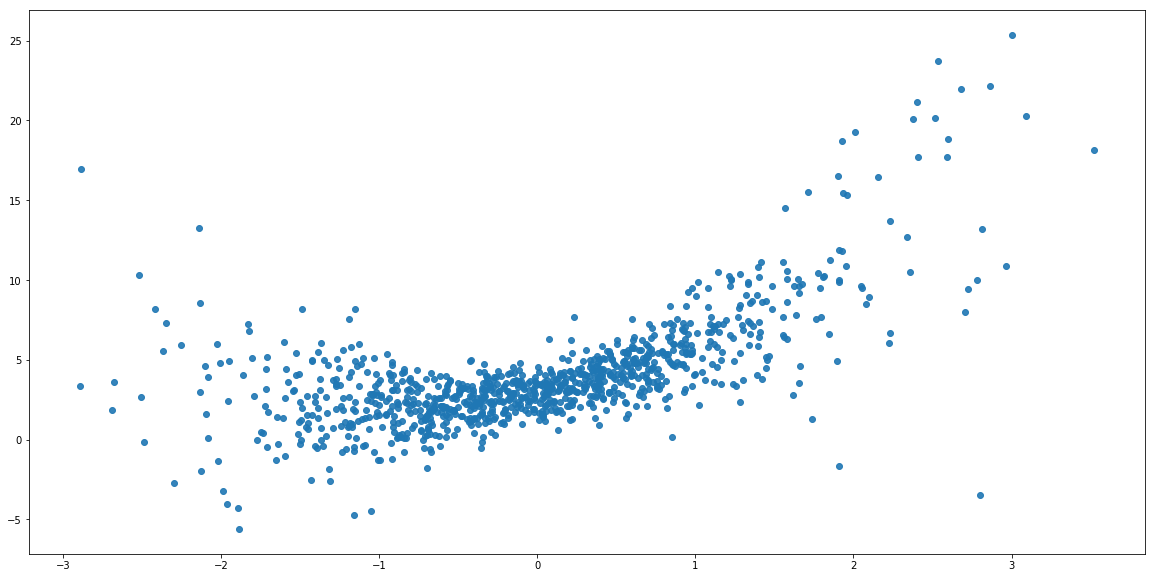

In [8]:
data_cloud =  generate_n_samples(1000)
plot_prediction_function(data = data_cloud)

### Visualizing samples of $Y$ for fixed values of $X$

In [9]:
def y_for_fixed_x( x_list = np.arange(-4, 4.5, 0.5), n_sample_per_x = 10):
    data = np.zeros([len(x_list)*n_sample_per_x, 2]);
    for i, x in enumerate(x_list):
        for j in range(n_sample_per_x):  
            g = sample_g();
            data[n_sample_per_x*i + j, 0] = x;
            data[n_sample_per_x*i + j, 1] = g(x);
    return data

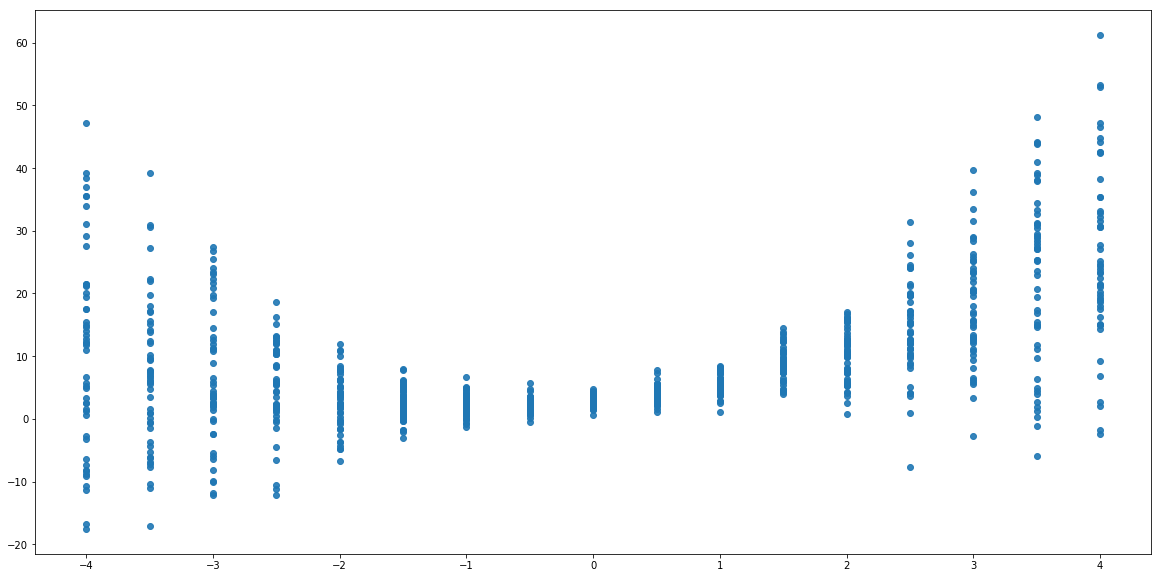

In [10]:
plot_prediction_function(data = y_for_fixed_x(n_sample_per_x=50) )

## Exercise:

Recall that the risk of a function $f$ wrt to loss $l$, $R(f) = E[l((f(x), y)]$ and the bayes optimal function $f^* = \underset{f}{\operatorname{argmin}}R(f)$ 

(Hint: for $X  \sim \mathcal{N}(0, 1)$,  $E[X^4] = 3$)

1. If we minimize l2 loss, what is the bayes optimal function $f^*(x)$ for the model described above? Does your answer depend on the distribution assumed on $X$?
2. What is the risk assosciated with $f^*(x)$, $R(f)$?
3. Once you have mathematical expressions for 1 and 2, fill in the python functions below for the bayes prediction function and bayes risk. 

In [11]:
## variable f_star assiged to bayes optimal function
## bayes risk with numerical value of bayes risk

## complete f_star and bayes_risk

f_star = partial(template_g, [0] )
bayes_risk = 0;
print(bayes_risk)

0


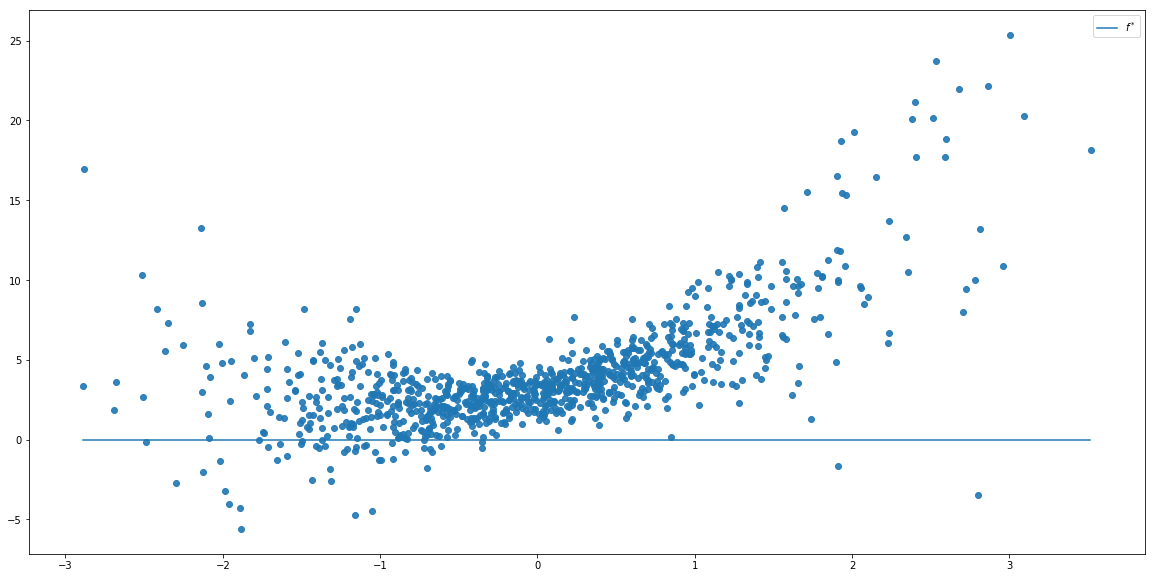

In [12]:
plot_prediction_function([f_star], ['$f^*$'], data=data_cloud)

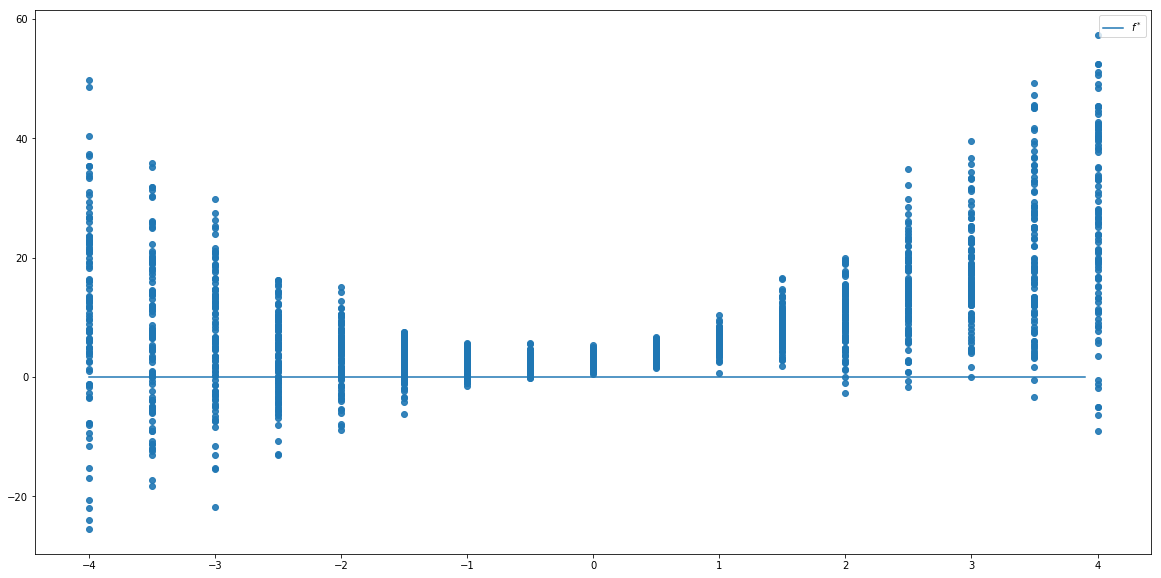

In [13]:
plot_prediction_function([f_star], ['$f^*$'], data=y_for_fixed_x(n_sample_per_x=100) )

## Estimating the Risk $R(f)$ using monte-carlo

In [14]:
def estimate_risk(f, n_try = int(1e5) ):
    sum = 0;
    for i in range(n_try):
        x, y = get_one_x_y_sample()
        sum += (f(x) - y)**2
    return sum/n_try

In [15]:
estimate_risk(f_star)

27.13671948975532

# Empirical Risk 

We never usually know $\mathcal{P}_{X, Y}$ and we work with finite samples drawn from the distribution. With $\mathcal{D}_n = ( (x_1, y_1), (x_2, y_2), \dots , (x_n, y_n) )$ be $n$ iid data points, the empirical risk of $f$ with respect to loss $l$ on dataset $\mathcal{D}_n$ is defined as $$ \hat{R}_n(f) = \frac{1}{n} \sum_{i=1}^{n} l( f(x_i), y_i) $$

Have we used the expression of $ \hat{R}_n(f) $ for anything till now?

### Exercise:

1. Is $\hat{R}_n(f)$ or $R(f)$ a random variable? If so, what is the mean of the random variable and what is it's distribution? 
2. Can $R(f) \geq  \hat{R}_n(f)$?



In [16]:
def empirical_risk(f, sample_matrix):
    fy_array = f(sample_matrix[:, 0]);
    risk = np.mean((fy_array - sample_matrix[:, 1]) ** 2)
    return risk

#### Checking the distribution of $\hat{R}_n(f)$

In [17]:
n = 1000;
emp_rsk = np.zeros(n)
for i in range(n):
    emp_rsk[i] = empirical_risk(f_star, generate_n_samples(5000))
    
print( np.mean(emp_rsk) )

27.033993339735325


/Users/sreyas/miniconda3/envs/denoising/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # Remove the CWD from sys.path while we load stuff.


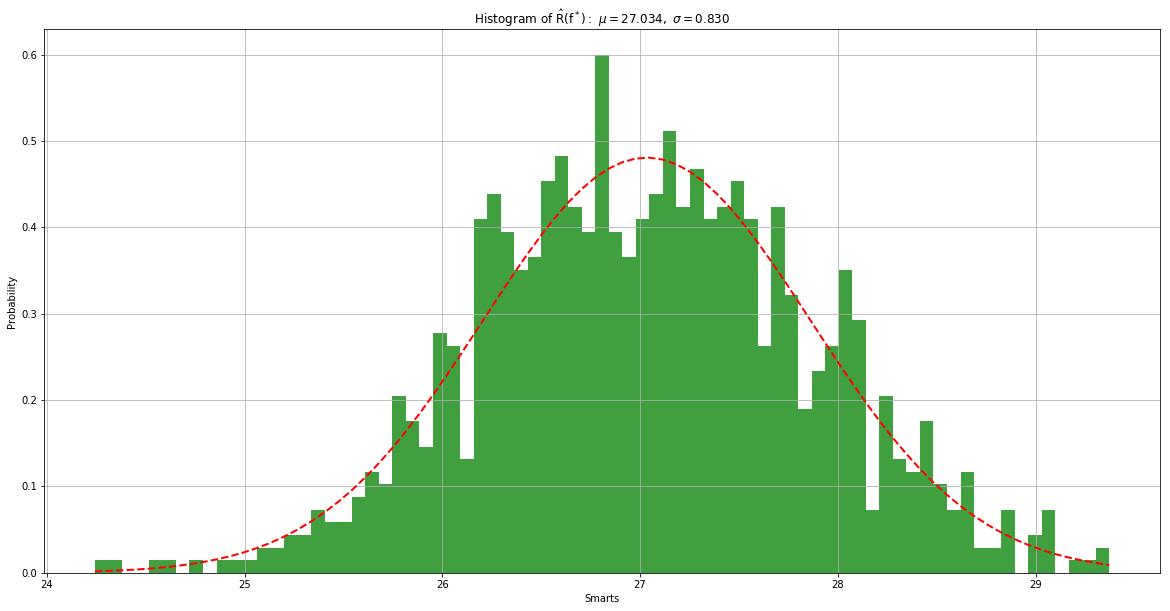

In [18]:
datos = emp_rsk
plt.figure(figsize=(20,10))
# best fit of data
(mu, sigma) = norm.fit(datos)

# the histogram of the data
n, bins, patches = plt.hist(datos, 75, density=True, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ \hat{R}(f^*):}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()



## Empirical Risk Minimization

Let's fix a training data with $n = 100$ points

In [19]:
data = generate_n_samples(n = 100);

### Visualizing Data

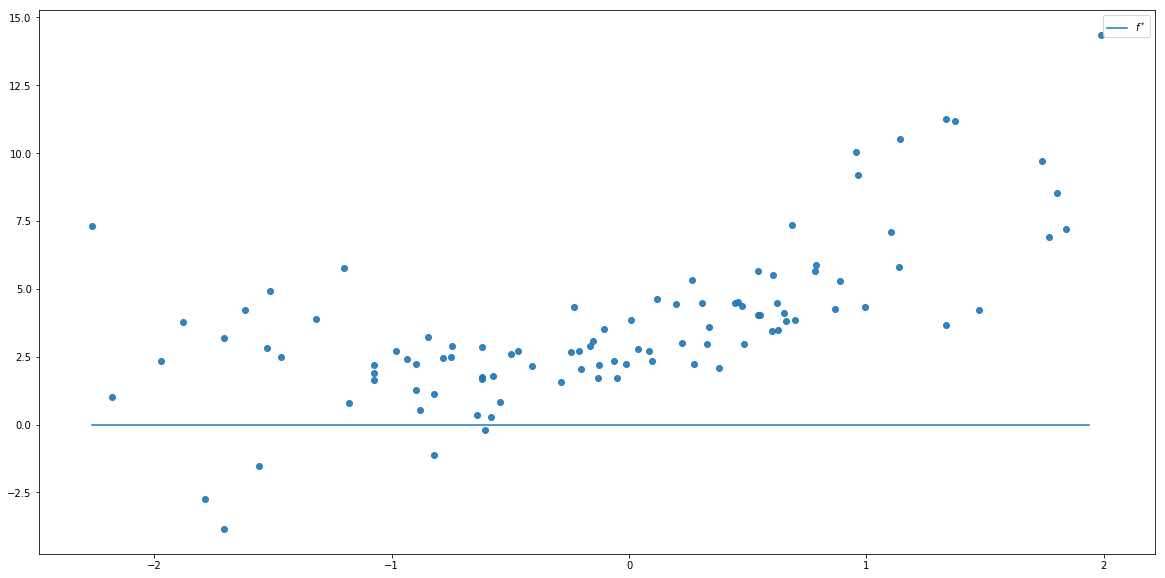

In [20]:
plot_prediction_function([f_star], ['$f^*$'], data)

### Exercise
One way to achieve $\hat{R}_n(f) = 0 $ is to memorize the data. For the sake of simplicity let's assume that the $\mathcal{D}_n$ we are working with has no duplicate values for $x$. The function $f(x)$ returns the corresponding $y$ from $\mathcal{D}_n$ otherwise $f(x)$ returns $0$. What is the risk, $R(f)$, for this function?

In [21]:
risk_memorized_function = 0
print(risk_memorized_function)

0


### Estimating the risk of memorized function numerically

In [22]:
def f_memorized(x_array):
    scalar = False
    if not isinstance(x_array,(list,np.ndarray)):
        scalar = True
        x_array = np.array([x_array]);
        
    result = np.zeros_like(x_array).astype(float)
    for i, x in enumerate(x_array):
        found = False
        for x_i, y_i in data:
            if x==x_i:
                result[i] = y_i;
                found = True
        if not found:
            result[i] = 0.0
            
    if scalar:
        return result[0]
    return result

In [23]:
linear_f_hat_risk = estimate_risk( f_memorized, n_try=int(1e3) ) 
print('Risk: ', linear_f_hat_risk)
linear_f_hat_empirical_risk = empirical_risk(f_memorized, data)
print('Empirical Risk: ', linear_f_hat_empirical_risk)

Risk:  25.886760102667846
Empirical Risk:  0.0


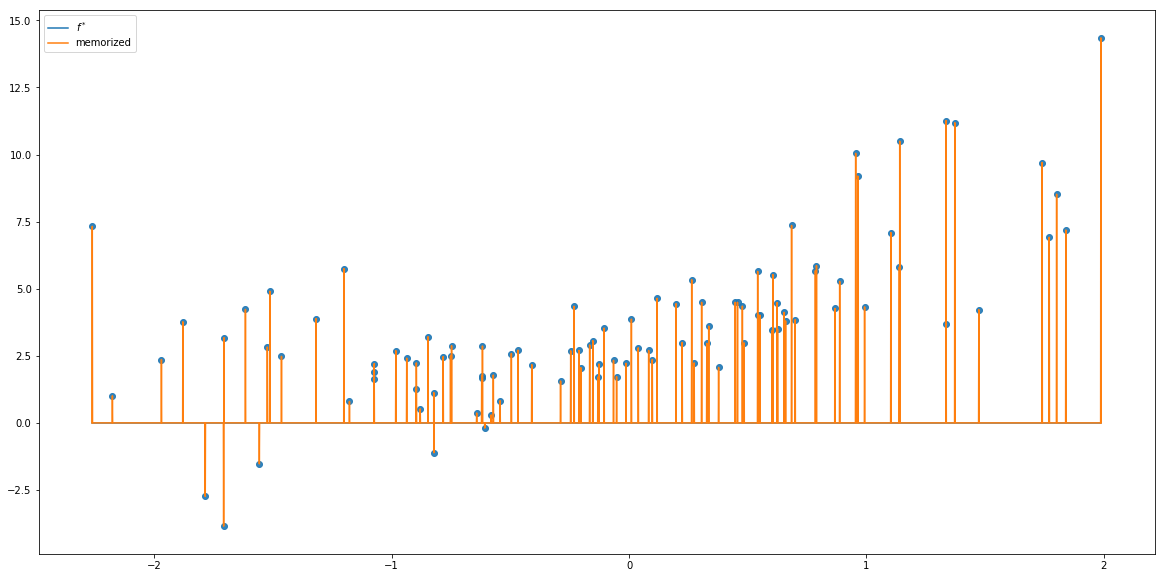

In [24]:
plot_prediction_function([f_star, f_memorized], ['$f^*$', 'memorized'], data, include_data_x=True)

### Constrained Risk Minimization

Like we saw in the previous section, (unconstrained) empirical risk minimization is (almost) useless in practise. We achieved perfect $0$ for empirical risk but we have a increase in the actual risk, which is the quantity we care about. 

#### Linear (Affine) Hypothesis Space

## Exercise
For $f(x) = \alpha x + \beta$
1. Calculate an expression for risk of $f(x)$
2. Find $\alpha^*, \beta^*$ which minimises $R(f)$.

In [25]:
### risk for linear function (alphax + beta)
## students fill in

def linear_function_risk(alpha, beta):
    return 0;
    

In [26]:
### Estimating Risk
### Students to fill in linear_f_star
linear_f_star = partial(template_g, [0]);

mc_linear_f_star_risk = estimate_risk( linear_f_star) 
print('MC Risk: ', mc_linear_f_star_risk)

linear_f_star_risk = linear_function_risk(mu_b, mu_a + mu_c)
print('Risk :' , linear_f_star_risk)

MC Risk:  27.00446435785947
Risk : 0


### Visualizing Prediction Function $\ \ f^*_\mathcal{H}$

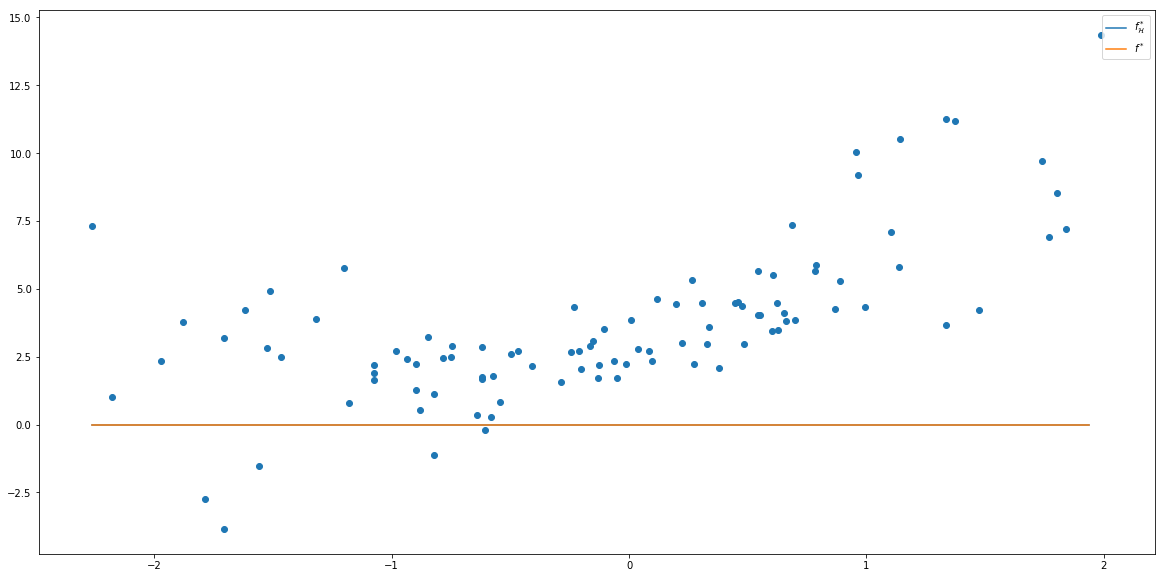

In [27]:
plot_prediction_function([linear_f_star, f_star], ['$f^*_\mathcal{H}$', '$f^*$'], data, alpha = 1)

### Constrained Empirical Risk Minimization

#### $\hat{\alpha}, \hat{\beta}$ which minimises $\hat{R}(f)$ and estimate the risk using monte carlo method.

In [28]:
## Fitting Linear Regression on Data
reg = linear_model.LinearRegression(fit_intercept=True).fit(data[:, 0:1], data[:, 1])

In [29]:
reg.intercept_, reg.coef_

(3.8484489452536237, array([1.8994861]))

In [30]:
linear_f_hat = partial(template_g, [reg.intercept_, reg.coef_[0]])

In [31]:
linear_f_hat_risk = linear_function_risk(reg.coef_[0], reg.intercept_)
print('Risk :' , linear_f_hat_risk)
mc_linear_f_hat_risk = estimate_risk( linear_f_hat ) 
print('MC Risk: ', mc_linear_f_hat_risk)
linear_f_hat_empirical_risk = empirical_risk(linear_f_hat, data)
print('Empirical Risk: ', linear_f_hat_empirical_risk)

Risk : 0
MC Risk:  6.968077202103871
Empirical Risk:  4.592553812416919


### Visualizing Prediction Function $\ \ \hat{f}_\mathcal{H}$

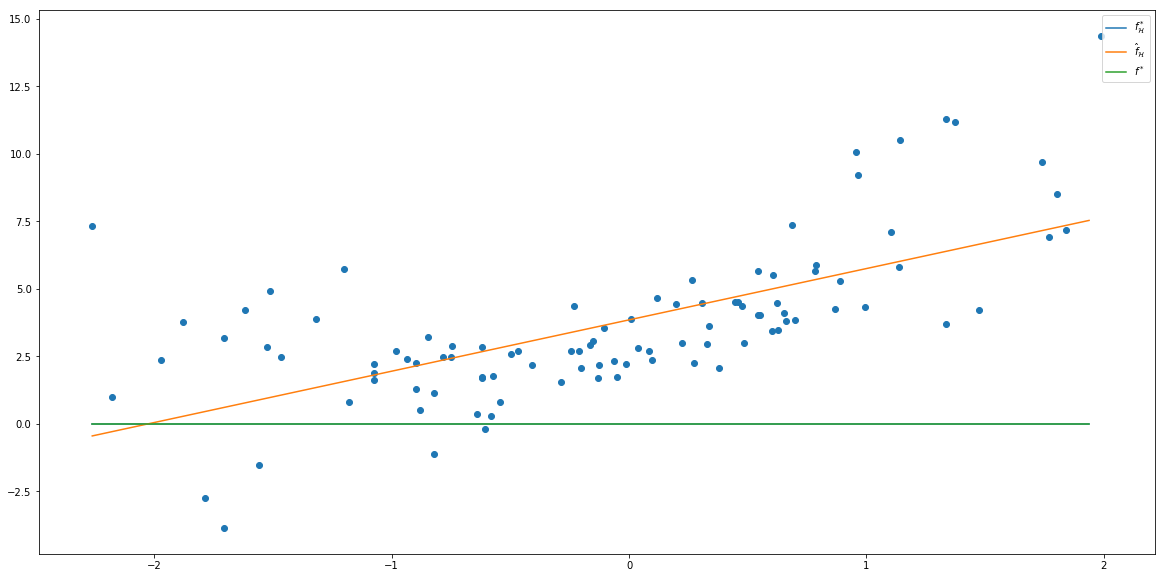

In [32]:
plot_prediction_function([linear_f_star, linear_f_hat, f_star], ['$f^*_\mathcal{H}$', '$\hat{f}_\mathcal{H}$', '$f^*$'], data, alpha = 1)

## Error Decomposition

Recall that: <br>
Approximation Error for $\mathcal{H}$ = $R(f^*_{\mathcal{H}}) - R(f^*) $ <br>
Estimation Error of $\ \hat{f}_\mathcal{H}$ = $R(\hat{f}_{\mathcal{H}}) - R(f_{\mathcal{H}})$ <br>
Excess Risk of f = $R(f) - R(f^*)$

### Exercise:
1. From the values we calculated above, what is the approximation error for linear hypothesis space? Is approximation error a random variable? 
2. What is the estimation error of $\ \hat{f}_\mathcal{H}$? Is estimation error a random variable? 
3. What is the excess risk of  $\ \hat{f}_\mathcal{H}$? Is this a random variable? 

#### Answers:

1. Approximation Error is not random. 
2. Estimation Error is random. 
3. Excess risk of $\ \hat{f}_\mathcal{H}$ is random.

### Estimation Error and Excess risk of $\hat{f}_\mathcal{H}$

In [33]:
def estimation_error_and_excess_risk(data, risk_fh, risk_f_star):
    reg = linear_model.LinearRegression(fit_intercept=True).fit(data[:, 0:1], data[:, 1]);
    linear_f_hat_risk = linear_function_risk(reg.coef_[0], reg.intercept_)
    
    return linear_f_hat_risk - risk_fh, linear_f_hat_risk - risk_f_star

In [34]:
n_try = 1000;
estimation_error_array = np.zeros(n_try);
excess_risk_array = np.zeros(n_try)
for i in range(n_try):
    estimation_error_array[i], excess_risk_array[i] = estimation_error_and_excess_risk( generate_n_samples(n = 100), linear_f_star_risk, bayes_risk)

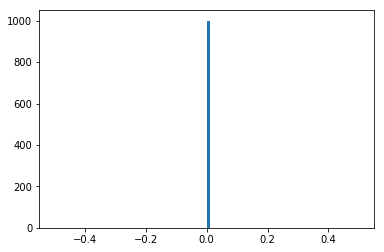

In [35]:
_ = plt.hist(estimation_error_array, bins = 100)

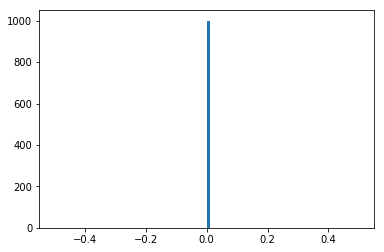

In [36]:
_ = plt.hist(excess_risk_array, bins = 100)

### Optimization Error

Since we were optimizing for L2 loss over a linear hypothesis space, we found the best possible $\hat{f}_\mathcal{H}$ (upto numerical error) using the closed form expression for linear regression. What if we use SGD instead to find $f$ and stop iterations prematurely?

In [37]:
reg_sgd = linear_model.SGDRegressor(max_iter=3, 
                                    fit_intercept = True, 
                                    penalty = 'none', #No Regularization
                                    tol = None)

In [38]:
reg_sgd.fit(data[:, 0:1], data[:, 1])

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=3,
       n_iter=None, n_iter_no_change=5, penalty='none', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [39]:
reg_sgd.intercept_, reg_sgd.coef_

(array([2.31098652]), array([1.06195199]))

In [40]:
linear_f_tilde = partial(template_g, [reg_sgd.intercept_[0], reg_sgd.coef_[0]])

In [41]:
linear_f_tilde_risk = linear_function_risk(reg_sgd.coef_[0], reg_sgd.intercept_[0])
print('Risk :' , linear_f_tilde_risk)
mc_linear_f_tilde_risk = estimate_risk( linear_f_tilde ) 
print('MC Risk: ', linear_f_tilde_risk)
linear_f_tilde_empirical_risk = empirical_risk(linear_f_tilde, data)
print('Empirical Risk: ', linear_f_tilde_empirical_risk)

Risk : 0
MC Risk:  0
Empirical Risk:  7.383567595936288


### Visualizing $\ \ \ \tilde{f_\mathcal{H} }$

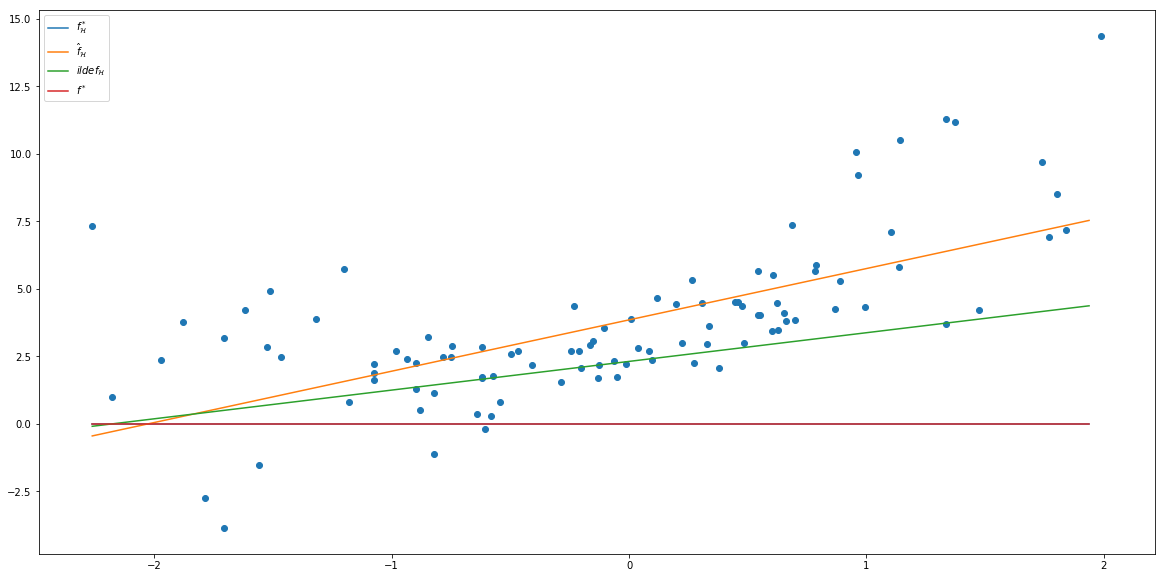

In [42]:
plot_prediction_function([linear_f_star, linear_f_hat, linear_f_tilde, f_star], 
                         ['$f^*_\mathcal{H}$', '$\hat{f}_\mathcal{H}$', '$\tilde{f_\mathcal{H}}$', '$f^*$'], 
                         data, alpha = 1)

### Exercise:
What is the optimization error? How do you expect it to change with the number of iterations of gradient descent?

# Additional Questions

1. Suppose we use another hypothesis space $\mathcal{H}' \subset \mathcal{H}$, how do you expect the approximation error to change?
2. Suppose we increase the number of data points $n$ in the sample to calculate $\ \hat{f}_\mathcal{H}$. How do we expect estimation error to change?
2. Repeat everything we did for linear hypothesis space for constant, quadratic and cubic hypothesis space for $n=500, 1000$ as well - does your results match with what you expected in 1 and 2?